In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn
%matplotlib inline

In [210]:
#load US stocks and GDP datasets
stocks = pd.read_csv('stocks.csv')
gdp = pd.read_csv('gdp.csv')

In [211]:
#set year as the index for stocks data frame
stocks = stocks.set_index(['Year'])

In [212]:
#rename the columns and set year as the index for gdp data frame
gdp = gdp.rename(columns={'Unnamed: 0':'Year', 'GDP in billions of chained 2009 dollars':'Real GDP in billions'})
gdp = gdp.set_index(['Year'])
gdp.head()

,GDP in billions of current dollars,Real GDP in billions
Year,,
1929,104.6,1056.6
1930,92.2,966.7
1931,77.4,904.8
1932,59.5,788.2
1933,57.2,778.3


In [213]:
#drop the nomial gdp column
gdp = gdp.drop('GDP in billions of current dollars', axis = 1)
gdp.head()

,Real GDP in billions
Year,
1929,1056.6
1930,966.7
1931,904.8
1932,788.2
1933,778.3


In [214]:
#merge gdp and stocks to one data frame and drop rows that contains Na
newData = pd.concat([gdp, stocks], axis = 1)
newData = newData.dropna()

In [215]:
#create a new column called GDP growth rate
newData.loc[1929, 'Real GDP in billions']
newData['GDP copy'] = newData['Real GDP in billions']

#create a function to calculate GDP growth rate
def growth ():
    n = 1930
    for n in range(1930, 2015):
        newData['GDP copy'].ix[n] = newData['Real GDP in billions'].ix[n-1]
        n += 1
    newData['GDP Growth Rate'] = (newData['Real GDP in billions']-newData['GDP copy'])/ newData['GDP copy']

#call the function, perform the calculation
growth()

In [216]:
#drop all unneeded columns
newData = newData.drop(['Stocks','T.Bills','T.Bonds','GDP copy', 'Stocks - Bills', 'Stocks - Bonds'], axis=1)

In [217]:
newData.head()

,Real GDP in billions,S&P 500,3-month T.Bill,10-year T. Bond,GDP Growth Rate
Year,,,,,
1929,1056.6,-0.0830,0.0316,0.0420,0.000000
1930,966.7,-0.2512,0.0455,0.0454,-0.085084
1931,904.8,-0.4384,0.0231,-0.0256,-0.064032
1932,788.2,-0.0864,0.0107,0.0879,-0.128868
1933,778.3,0.4998,0.0096,0.0186,-0.012560


In [218]:
#format rate of returns and GDP growth rate to percent
newData['S&P 500'] = pd.Series(['{0:.2f}%'.format(val*100) for val in newData['S&P 500']],
                                    index = newData.index)
newData['3-month T.Bill'] = pd.Series(['{0:.2f}%'.format(val*100) for val in newData['3-month T.Bill']],
                                    index = newData.index)
newData['10-year T. Bond'] = pd.Series(['{0:.2f}%'.format(val*100) for val in newData['10-year T. Bond']],
                                    index = newData.index)
newData['GDP Growth Rate']= pd.Series(['{0:.2f}%'.format(val*100) for val in newData['GDP Growth Rate']],
                                    index = newData.index)

In [219]:
newData.head()

,Real GDP in billions,S&P 500,3-month T.Bill,10-year T. Bond,GDP Growth Rate
Year,,,,,
1929,1056.6,-8.30%,3.16%,4.20%,0.00%
1930,966.7,-25.12%,4.55%,4.54%,-8.51%
1931,904.8,-43.84%,2.31%,-2.56%,-6.40%
1932,788.2,-8.64%,1.07%,8.79%,-12.89%
1933,778.3,49.98%,0.96%,1.86%,-1.26%


In [220]:
#find the top5 years with highest GDP growth rate
newData['GDP Growth Rate'].sort_values(ascending = False).head()

Year
1935    8.91%
1940    8.81%
1950    8.72%
1951    8.06%
1944    7.99%
Name: GDP Growth Rate, dtype: object

In [221]:
#find the top 5 years with highest rate of return for S&P 500 stocks
newData['S&P 500'].sort_values(ascending = False).head()

Year
1993    9.97%
1992    7.49%
1956    7.44%
1978    6.51%
1984    6.15%
Name: S&P 500, dtype: object

In [222]:
#find the top 5 years with highest rate of return for T.Bill
newData['3-month T.Bill'].sort_values(ascending = False).head()

Year
1979    9.94%
1984    9.61%
1983    8.45%
1989    8.11%
1974    7.78%
Name: 3-month T.Bill, dtype: object

In [223]:
#find the top 5 years with highest rate of return for T. bond
newData['10-year T. Bond'].sort_values(ascending = False).head()

Year
1997    9.94%
1971    9.79%
1992    9.36%
1932    8.79%
2010    8.46%
Name: 10-year T. Bond, dtype: object

In [224]:
#create function to plot real GDP for selected year range

def gdp_range(y1, y2):
    data = newData.loc[y1:y2,'Real GDP in billions']
    plot = data.plot(kind = 'line', title =str(y1)+' - '+ str(y2)+ ' US GDP', figsize = (10, 5), fontsize=12)
    plt.xlabel('Year')
    plt.ylabel('$ in billions')
    
    #create function to format y label and make it display with commas
    def update_labels(ax):
        ylabels = [format(label, ',.0f') for label in ax.get_yticks()]
        ax.set_yticklabels(ylabels)
    update_labels(plot)
    
    plt.show() 

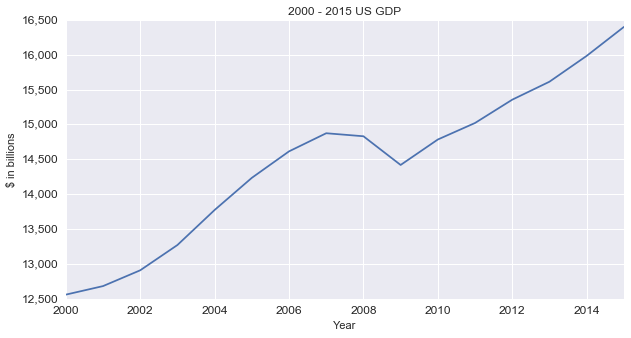

In [225]:
#plot real GDP from 2000 to 2015
gdp_range(2000, 2015)

In [226]:
#create function to plot all 3 types of stocks rate of return for selected year range 

def plotRR(y1, y2):
    newData['S&P 500'] = newData['S&P 500'].replace('%', '', regex=True).astype('float')
    newData['3-month T.Bill'] = newData['3-month T.Bill'].replace('%', '', regex=True).astype('float')
    newData['10-year T. Bond'] = newData['10-year T. Bond'].replace('%', '', regex=True).astype('float')
    data = newData.loc[y1:y2, 'S&P 500':'10-year T. Bond']
    plot = data.plot(kind = 'line', title =str(y1)+' - '+ str(y2)+ ' US Stock Rate of Returns',figsize =(15, 6),fontsize=12)
    plt.xlabel('Year')
    plt.ylabel('Rate of Return %')   
    plt.show()

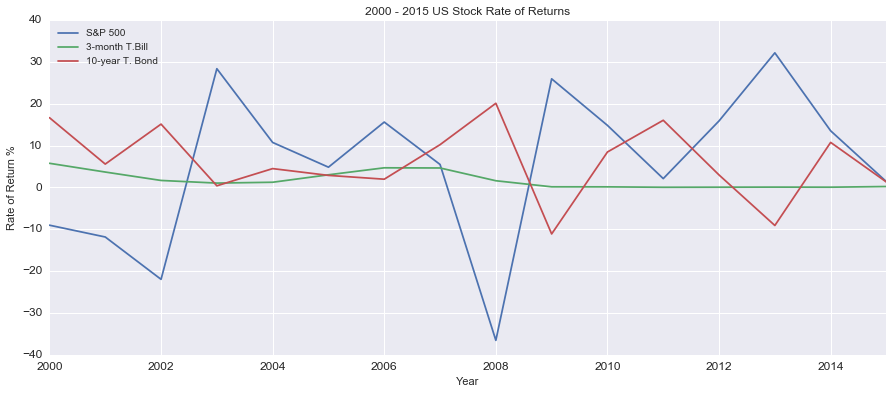

In [227]:
plotRR(2000,2015)

In [228]:
#plot rate of return only for T.Bill

def plotTbill(y1, y2):
    newData['3-month T.Bill'] = newData['3-month T.Bill'].replace('%', '', regex=True).astype('float')
    data = newData.loc[y1:y2, '3-month T.Bill']
    plot = data.plot(kind = 'bar', title =str(y1)+' - '+ str(y2)+ ' US T.Bill Rate of Returns',figsize = (12, 6), rot=60)
    plt.xlabel('Year')
    plt.ylabel('Rate of Return %') 
    plt.show()

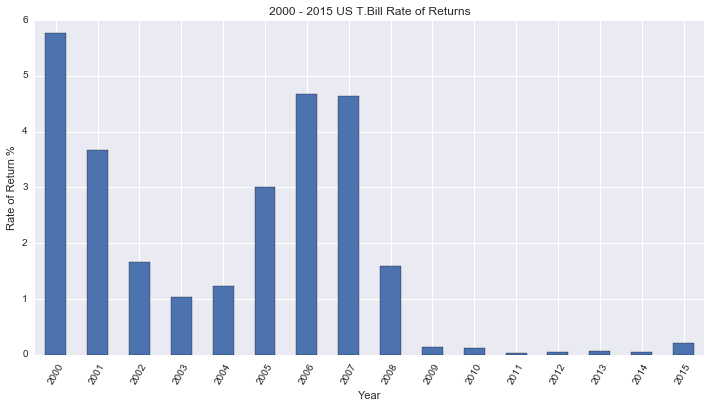

In [229]:
plotTbill(2000,2015)

In [230]:
#plot rate of return only for S&P 500 stock

def plotSP500(y1, y2):
    newData['S&P 500'] = newData['S&P 500'].replace('%', '', regex=True).astype('float')
    data = newData.loc[y1:y2, 'S&P 500']
    plot = data.plot(kind = 'bar', title =str(y1)+' - '+ str(y2)+ ' US S&P 500 Stocks Rate of Returns',figsize = (10, 5),rot = 60)
    plt.xlabel('Year')
    plt.ylabel('Rate of Return %') 
    plt.show()

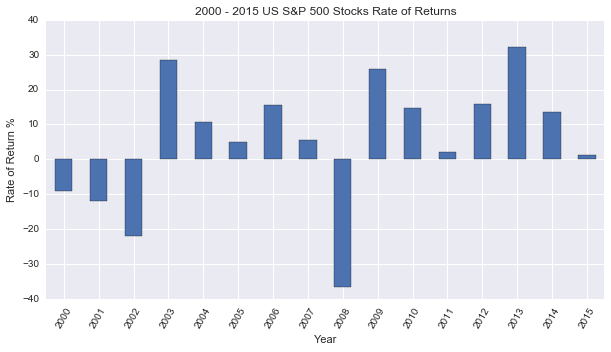

In [231]:
plotSP500(2000,2015)

In [232]:
#plot rate of return only for T.Bond

def plotTbond(y1, y2):
    newData['10-year T. Bond'] = newData['10-year T. Bond'].replace('%', '', regex=True).astype('float')
    data = newData.loc[y1:y2, '10-year T. Bond']
    plot = data.plot(kind = 'bar', title =str(y1)+' - '+ str(y2)+ ' US T.Bond Rate of Returns',figsize = (10, 5),rot = 60)
    plt.xlabel('Year')
    plt.ylabel('Rate of Return %') 
    plt.show()

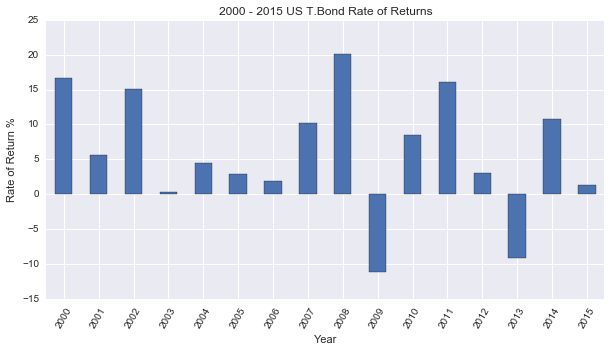

In [233]:
plotTbond(2000,2015)

In [234]:
#plot GDP growth rate for selected year range

def gdpGrowth(y1, y2):
    newData['GDP Growth Rate'] = newData['GDP Growth Rate'].replace('%', '', regex=True).astype('float')
    data = newData.loc[y1:y2,'GDP Growth Rate']
    plot = data.plot(kind = 'bar', title =str(y1)+' - '+ str(y2)+ ' US Real GDP Growth Rate',figsize = (10, 5), rot=60)
    plt.xlabel('Year')
    plt.ylabel('%')
    plt.show()

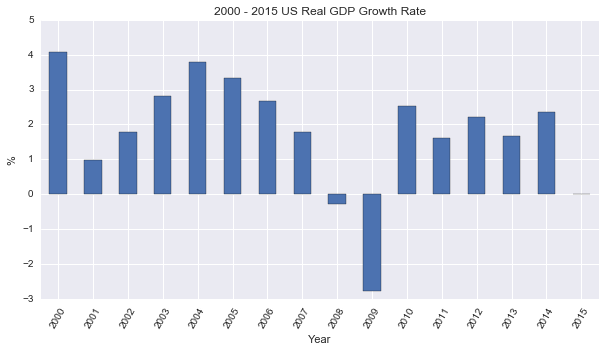

In [235]:
gdpGrowth(2000,2015)

In [236]:
#create function to plot GDP growth rate and stocks rate of return in one plot

def gdp_sp500(y1, y2):
    data = newData.loc[y1:y2]
    data1 = data.loc[:,'S&P 500']
    plot = data1.plot(kind='line', label='S&P 500 Stocks Rate of Return')
    data.loc[:,'GDP Growth Rate'].plot(kind = 'line' ,ax = plot, figsize=(10,5), fontsize=12)
    plt.legend(loc='best')
    plt.title(str(y1)+' - '+str(y1)+' US GDP Growth Rate vs. S&P 500 Stocks Rate of Return')
    plt.xlabel('Year')
    plt.ylabel('%')
    plt.show()

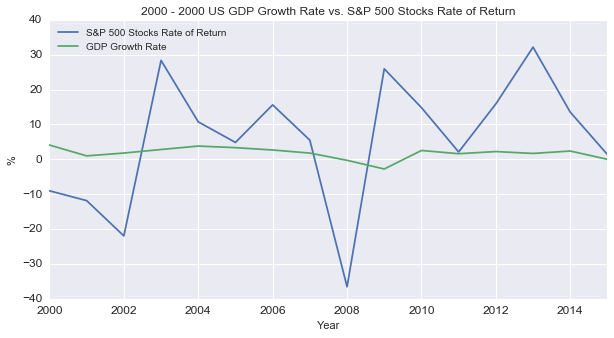

In [237]:
gdp_sp500(2000,2015)

In [238]:
#create function to plot GDP growth rate and rate of return of T.Bills in one plot

def gdp_Tbill(y1, y2):
    data = newData.loc[y1:y2]
    data1 = data.loc[:,'3-month T.Bill']
    plot = data1.plot(kind='line', label='T.Bill Rate of Return')
    data.loc[:,'GDP Growth Rate'].plot(kind = 'line' ,ax = plot, figsize=(10,5), fontsize=12)
    plt.legend(loc='best')
    plt.title(str(y1)+' - '+str(y1)+' US GDP Growth Rate vs. T.Bill Rate of Return')
    plt.xlabel('Year')
    plt.ylabel('%')
    plt.show()

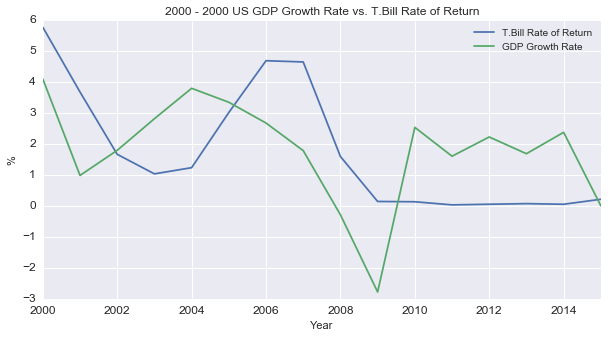

In [239]:
gdp_Tbill(2000,2015)

In [240]:
#create function to plot GDP growth rate and stocks rate of return in one plot

def gdp_Tbond(y1, y2):
    data = newData.loc[y1:y2]
    data1 = data.loc[:,'10-year T. Bond']
    plot = data1.plot(kind='line', label='T. Bond Rate of Return')
    data.loc[:,'GDP Growth Rate'].plot(kind = 'line' ,ax = plot, figsize=(10,5), fontsize=12)
    plt.legend(loc='best')
    plt.title(str(y1)+' - '+str(y1)+' US GDP Growth Rate vs. T.Bond Rate of Return')
    plt.xlabel('Year')
    plt.ylabel('%')
    plt.show() 

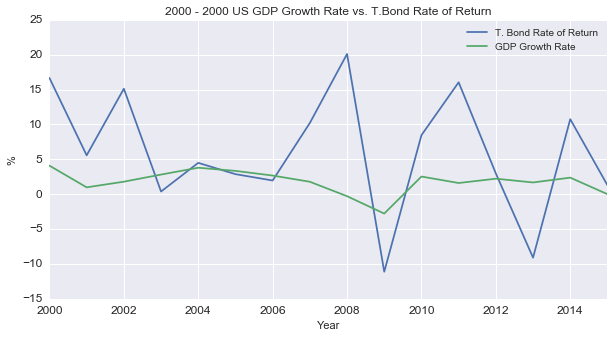

In [241]:
gdp_Tbond(2000,2015)